### import necessary functions and libraries


In [9]:
import rgasp
from functions import *

import numpy as np
import scipy as sp
import pandas as pd
import scipy.stats 
from scipy.stats import qmc
import matplotlib.pyplot as plt
import lhsmdu 


P_rgasp = rgasp.rgasp()

## Part I: Robust GP example

#### 1D example (higdon_1_data) of Robust Gasp

<class 'numpy.float64'>
The upper bounds of the range parameters are [28.80931681] 

The initial values of range parameters are [0.57618634] 

Start of the optimization  0  : 

The number of iterations is  4 

The value of the  marginal posterior 

 function is  2.0078288276079816 

Optimized range parameters are [1.73972502] 

Optimized nugget parameter is 0 

Convergence:  True 

The initial values of range parameters are [0.08022094] 

Start of the optimization  1  : 

The number of iterations is  5 

The value of the  marginal posterior 

 function is  2.007828827607647 

Optimized range parameters are [1.73972537] 

Optimized nugget parameter is 0 

Convergence:  True 

Mean parameters:  [0.01137194] 

Variance parameter:  0.5607415962609481 

Range parameters:  [1.73972502] 

Noise parameter:  0.0 



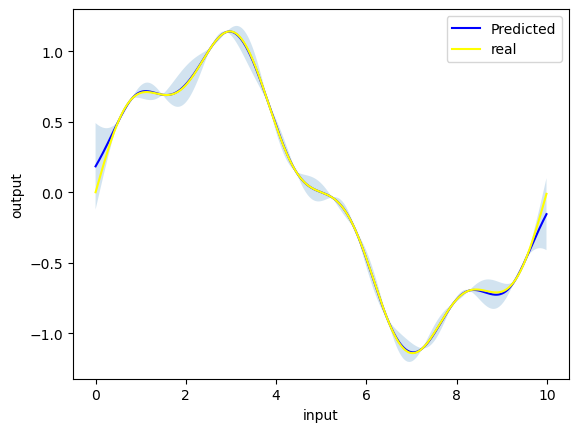

In [3]:
# Generate the training sample
sampler = qmc.LatinHypercube(d=1)
sample_input = 10 * sampler.random(n=15)
sample_output = higdon_1_data(sample_input)

# create a task for model training
task = P_rgasp.create_task(sample_input, sample_output)  # optimization='nelder-mead'

# train a rgasp model using created task
model = P_rgasp.train(task)

# testing input and output
testing_input = np.arange(0,10,1/100).reshape(-1,1)
testing_output=higdon_1_data(testing_input)

# get the rgasp predict object
# testing_predict['mean'] : predicted mean 
testing_predict = P_rgasp.predict_rgasp(model, 
                  testing_input)



# Display the plot
fig, ax = plt.subplots()
# Plot the first line on the axes
ax.plot(testing_input,testing_predict['mean'], label='Predicted', color = 'blue')

# Plot the second line on the axes
ax.plot(testing_input, testing_output, color = 'yellow', label='real')
ax.fill_between(testing_input[:,0], testing_predict['upper95'], testing_predict['lower95'], alpha=0.2)
# Set the labels and title of the plot
ax.set_xlabel('input')
ax.set_ylabel('output')
#ax.set_title('Sine and Cosine Waves')
# Add a legend to the plot
ax.legend()
plt.show()

#### Mutidimensional input example (friedman) of Robust Gasp without trend

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
The upper bounds of the range parameters are [104.28956648 104.67672966 105.69579226 104.73639872 102.56023232] 

The initial values of range parameters are [2.08579133 2.09353459 2.11391585 2.09472797 2.05120465] 

Start of the optimization  0  : 

The number of iterations is  15 

The value of the  marginal posterior 

 function is  -82.79789761543435 

Optimized range parameters are [ 2.03692492  2.21439568  4.52536822 22.99224159 35.89819695] 

Optimized nugget parameter is 0 

Convergence:  True 

The initial values of range parameters are [2.23190316 2.24018885 2.26199783 2.24146583 2.19489365] 

Start of the optimization  1  : 

The number of iterations is  14 

The value of the  marginal posterior 

 function is  -82.79789762071839 

Optimized range parameters are [ 2.0369225   2.21441629  4.52540715 22.99195998 35.89802886] 

Optimized nugget parameter is 0 


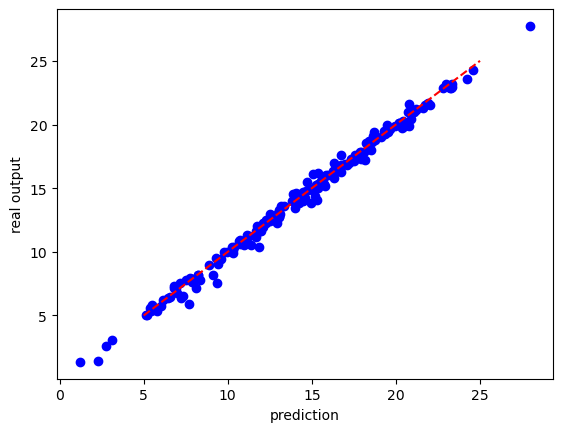

In [5]:
sampler = qmc.LatinHypercube(d=5)
sample_input = sampler.random(n=40)

from numpy import genfromtxt
#my_sample_inputdata = genfromtxt('/Users/HL/Desktop/input.csv', delimiter=',')
#sample_input = my_sample_inputdata[1:,]
num_obs=sample_input.shape[0]
sample_output= np.zeros((num_obs,1))

for i in range(num_obs):
    sample_output[i,0]=friedman_5_data(sample_input[i,:])

task = P_rgasp.create_task(sample_input, sample_output)  # optimization='nelder-mead'
model = P_rgasp.train(task)


dim_inputs=sample_input.shape[1]
num_testing_input = 200    
testing_input =  np.random.uniform(size =num_testing_input*dim_inputs).reshape(num_testing_input,-1)

testing_predict = P_rgasp.predict_rgasp(model, 
                  testing_input)

testing_output = np.zeros((num_testing_input,1))

for i in range(num_testing_input):
    testing_output[i,0]=friedman_5_data(testing_input[i,:])


m_rmse=np.sqrt(np.mean( (testing_predict['mean']-testing_output[:,0])**2))#/np.std(testing_output[:,0])
print('RMSE is ', m_rmse)

#####see the proportion 
prop_m = np.sum((testing_predict['lower95']<=testing_output[:,0]) & (testing_predict['upper95']>=testing_output[:,0]))/testing_output.shape[0]
print("The Proportion of the test output covered by 95% CI is ",prop_m)

length_m = np.mean(testing_predict['upper95']-testing_predict['lower95'])
print("The average length of the CI is ",length_m)

# Display the plot
fig, ax = plt.subplots()
# Plot the first line on the axes
ax.scatter(testing_predict['mean'],testing_output, label='Predicted', color = 'blue')
ax.set_xlabel('prediction')
ax.set_ylabel('real output')
ref_line_x = np.array([5, 25])
ref_line_y = np.array([5, 25])
ax.plot(ref_line_x, ref_line_y, linestyle='--', color='r')
plt.show()

#### Mutidimensional input example (friedman) of Robust Gasp with trend

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
The upper bounds of the range parameters are [104.28956648 104.67672966 105.69579226 104.73639872 102.56023232] 

The initial values of range parameters are [2.08579133 2.09353459 2.11391585 2.09472797 2.05120465] 

Start of the optimization  0  : 

The number of iterations is  14 

The value of the  marginal posterior 

 function is  -50.32267718778803 

Optimized range parameters are [  1.51483284   1.73446016   3.23401913 104.73639872 102.56023232] 

Optimized nugget parameter is 0 

Convergence:  True 

The initial values of range parameters are [2.23190316 2.24018885 2.26199783 2.24146583 2.19489365] 

Start of the optimization  1  : 

The number of iterations is  13 

The value of the  marginal posterior 

 function is  -50.32267718773235 

Optimized range parameters are [  1.51483294   1.7344601    3.23402561 104.73639872 102.56023232] 

Optimized nugget parame

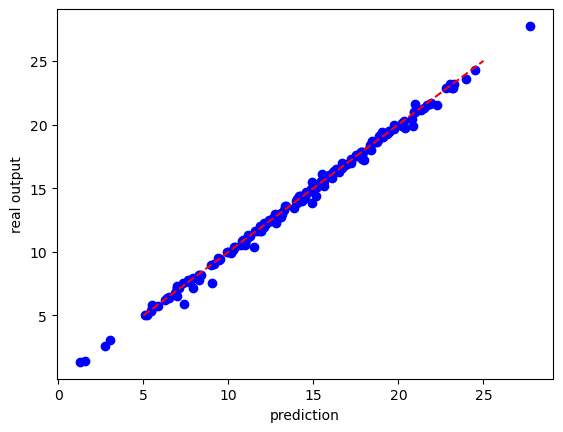

The Proportion of the test output covered by 95% CI is  0.985
The average length of the CI is  0.979835426162382


In [6]:
trend_rgasp = np.column_stack((np.repeat(1.0,num_obs),sample_input))
task_trend = P_rgasp.create_task(sample_input, sample_output,trend = trend_rgasp)  # optimization='nelder-mead'
model_trend = P_rgasp.train(task_trend)

trend__test_rgasp = np.column_stack((np.repeat(1.0,num_testing_input),testing_input))

testing_trend_predict = P_rgasp.predict_rgasp(model_trend, 
                  testing_input, testing_trend = trend__test_rgasp)

m_trend_rmse=np.sqrt(np.mean( (testing_trend_predict['mean']-testing_output[:,0])**2))
print('RMSE is ', m_trend_rmse)
# Display the plot
fig, ax = plt.subplots()
# Plot the first line on the axes
ax.scatter(testing_trend_predict['mean'],testing_output, label='Predicted', color = 'blue')
ax.set_xlabel('prediction')
ax.set_ylabel('real output')
ref_line_x = np.array([5, 25])
ref_line_y = np.array([5, 25])
ax.plot(ref_line_x, ref_line_y, linestyle='--', color='r')
plt.show()

prop_m = np.sum((testing_trend_predict['lower95']<=testing_output[:,0]) & (testing_trend_predict['upper95']>=testing_output[:,0]))/testing_output.shape[0]
print("The Proportion of the test output covered by 95% CI is ",prop_m)

length_m = np.mean(testing_trend_predict['upper95']-testing_trend_predict['lower95'])
print("The average length of the CI is ",length_m)

## Part II: PP GaSP Emulation example

#### humanity model

In [10]:
humanity_X = genfromtxt('./dataset/humanity_X.csv', delimiter=',')[1:,:]
humanity_Y = genfromtxt('./dataset/humanity_Y.csv', delimiter=',')[1:,:]
task = P_rgasp.create_task(humanity_X, humanity_Y, nugget_est=True, num_initial_values = 3)  # optimization='nelder-mead'
model = P_rgasp.train_ppgasp(task)
humanity_Xt = genfromtxt('./dataset/humanity_Xt.csv', delimiter=',')[1:,:]
humanity_Yt = genfromtxt('./dataset/humanity_Yt.csv', delimiter=',')[1:,:]

testing_predict = P_rgasp.predict_ppgasp(model, 
                  humanity_Xt)

m_rmse=np.sqrt(np.mean( (testing_predict['mean']-humanity_Yt)**2))#/np.std(testing_output[:,0])
print('RMSE is ', m_rmse)
print("std of testing y", np.std(humanity_Yt))

prop_m = np.sum((testing_predict['lower95']<=humanity_Yt) & (testing_predict['upper95']>=humanity_Yt))/(humanity_Yt.shape[0]*humanity_Yt.shape[1])
print("The Proportion of the test output covered by 95% CI is ",round(prop_m,4))

#### ppgasp with trend 
humanity_X2 = pd.read_csv('./dataset/humanity_X_2.csv')
humanity_Xt2 = pd.read_csv('./dataset/humanity_Xt_2.csv')

trend_ppgasp = np.column_stack((np.repeat(1.0,humanity_X.shape[0]),humanity_X2['foodC'].to_numpy()))
task_trend = P_rgasp.create_task(humanity_X, humanity_Y,trend = trend_ppgasp, nugget_est=True, num_initial_values = 3)  # optimization='nelder-mead'
model_trend = P_rgasp.train_ppgasp(task_trend)

trend__test_rgasp = np.column_stack((np.repeat(1.0,humanity_Xt.shape[0]),humanity_Xt2['foodC'].to_numpy()))

testing_trend_predict = P_rgasp.predict_ppgasp(model_trend, 
                  humanity_Xt, testing_trend = trend__test_rgasp)

m_rmse=np.sqrt(np.mean( (testing_trend_predict['mean']-humanity_Yt)**2))#/np.std(testing_output[:,0])
print('RMSE is ', m_rmse)
print("std of testing y", np.std(humanity_Yt))
prop_m = np.sum((testing_trend_predict['lower95']<=humanity_Yt) & (testing_trend_predict['upper95']>=humanity_Yt))/(humanity_Yt.shape[0]*humanity_Yt.shape[1])
print("The Proportion of the test output covered by 95% CI is ",round(prop_m,4))



<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
[-4.997481068024515, -4.998179123004832, -4.990022254502466, -4.993974672057972, -4.996096073227457, -4.993976403585193, -4.998644559484704, -4.99569616864201, -4.997340449656613, -5.001725794989886, -5.001137658398933, -5.00335955323991, -5.00335955323991, -inf]
The upper bounds of the range parameters are [148.0397869  148.14316288 146.93969353 147.52160978 147.83489448
 147.52186522 148.21213017 147.77578645 148.01897125 148.66951093
 148.58209866 148.91259949 148.91259949          inf] 

The initial values of range parameters are [2.96079574 2.96286326 2.93879387 2.9504322  2.95669789 2.9504373
 2.9642426  2.95551573 2.96037942 2.97339022 2.97164197 2.97825199
 2.97825199] 



/Users/HL/Documents/GitHub/P_RobustGP/rgasp.py:1028: RuntimeWarning: divide by zero encountered in true_divide
  print('The upper bounds of the range parameters are',1/np.exp(model_LB),'\n')


The number of iterations is  52 

The value of the  marginal posterior 

 function is  -5146.3677993379315 

Optimized range parameters are [ 21.80486491   2.43070547   7.11866621  39.81219109 147.83489448
  55.05258932 148.21213017   2.71828268 129.42535057  64.78341241
   0.57818867   1.44737021   0.89575238] 

Optimized nugget parameter is 0.0009766141812700207 

Convergence:  True 

The initial values of range parameters are [12.3750316  12.38367306 12.28307192 12.33171582 12.3579041  12.33173717
 12.38943822 12.35296311 12.37329156 12.42767187 12.42036485 12.44799227
 12.44799227] 

Start of the optimization  1  : 

The number of iterations is  54 

The value of the  marginal posterior 

 function is  -5146.3677895980545 

Optimized range parameters are [ 21.79591146   2.42988761   7.11584156  39.80712247 147.83489448
  55.08955362 148.21213017   2.71727309 127.78804097  64.76360766
   0.57818488   1.44709515   0.89572027] 

Optimized nugget parameter is 0.0009773213221155033 

Co

### PPGasp: TITAN2D example

In [11]:
#### TITAN2D data
import pandas as pd
input_variables = pd.read_csv('./dataset/input_variables.csv',index_col =0).to_numpy()
pyroclastic_flow_heights = pd.read_csv('./dataset/pyroclastic_flow_heights.csv',index_col =0).to_numpy()
loc_index = pd.read_csv('./dataset/loc_index.csv',index_col =0).to_numpy()

#loc_index.reset_index(inplace = True, drop = True)

#pyroclastic_flow_heights.reset_index(inplace = True)
training_input = input_variables[0:50,:]
testing_input = input_variables[50:683,:]

output=pyroclastic_flow_heights[0:50,(loc_index[2,]==1)]
testing_output=pyroclastic_flow_heights[50:683,loc_index[2,]==1]


n = output.shape[0]
n_testing = testing_output.shape[0]

##delete those location where all output are zero

index_all_zero=[]
for i in range(output.shape[1]):
    if np.sum(output[:,i]==0)==50:
        index_all_zero.append(i)

output_log=np.log(output+1)
output_log_1 = np.delete(output_log,index_all_zero, axis = 1)
k=output_log_1.shape[1]

trend = np.column_stack((np.repeat(1.0,n),training_input[:,0]))
task = P_rgasp.create_task(training_input[:,0:3], output_log_1, trend = trend, nugget_est=True, max_eval = 100,num_initial_values = 3)  # optimization='nelder-mead'
model = P_rgasp.train_ppgasp(task)

testing_trend_predict = P_rgasp.predict_ppgasp(model, 
                  testing_input[:,0:3], testing_trend = np.column_stack((np.repeat(1.0,n_testing),testing_input[:,0])))

m_pred_ppgasp_mean=np.exp(testing_trend_predict['mean'])-1
m_pred_ppgasp_LB=np.exp(testing_trend_predict['lower95'])-1
m_pred_ppgasp_UB=np.exp(testing_trend_predict['upper95'])-1

test_out = np.delete(testing_output,index_all_zero, axis = 1)
m_trend_rmse=np.sqrt(np.mean( (m_pred_ppgasp_mean-np.delete(testing_output,index_all_zero, axis = 1))**2))
print('RMSE is ', m_trend_rmse)
prop_m = np.sum((m_pred_ppgasp_LB<=test_out) & (m_pred_ppgasp_UB>=test_out))/(test_out.shape[0]*test_out.shape[1])
print("The Proportion of the test output covered by 95% CI is ",round(prop_m,4))



/Users/HL/Documents/GitHub/P_RobustGP/rgasp.py:876: UserWarning: Please consider to select optimization= 'nelder-mead' or 
                            'brent' as the derivative-based optimization can be inaccurate 
                            when the number of observations is large.
  warnings.warn("""Please consider to select optimization= 'nelder-mead' or
/Users/HL/Documents/GitHub/P_RobustGP/rgasp.py:1028: RuntimeWarning: divide by zero encountered in true_divide
  print('The upper bounds of the range parameters are',1/np.exp(model_LB),'\n')


<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
[-5.38712423418189, -6.813001997766687, -6.959502878388407, -inf]
The upper bounds of the range parameters are [ 218.57391349  909.59732153 1053.1099034            inf] 

The initial values of range parameters are [ 4.37147827 18.19194643 21.06219807] 

Start of the optimization  0  : 

The number of iterations is  15 

The value of the  marginal posterior 

 function is  126404.07131022924 

Optimized range parameters are [0.78937816 1.46050733 4.06007413] 

Optimized nugget parameter is 0.016063305210863875 

Convergence:  True 

The initial values of range parameters are [0.64889057 2.700364   3.12641649] 

Start of the optimization  1  : 

The number of iterations is  17 

The value of the  marginal posterior 

 function is  126404.07130929772 

Optimized range parameters are [0.78937639 1.46050519 4.06007854] 

Optimized nugget parameter is 0.016063601177281586 

Convergence:  True 

The initial values of rang